<a href="https://colab.research.google.com/github/ashikKN/UnsupervisedLearning_CaseStudy/blob/main/CaseStudy_USL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv("/content/force2020_data (1).csv")

In [ ]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [ ]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


# **Data Preprocessing**

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
data=data.dropna(subset='NPHI')
data=data.dropna(subset='PEF')
data=data.dropna(subset='DTC')

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


**Outlier Detection And Removal**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


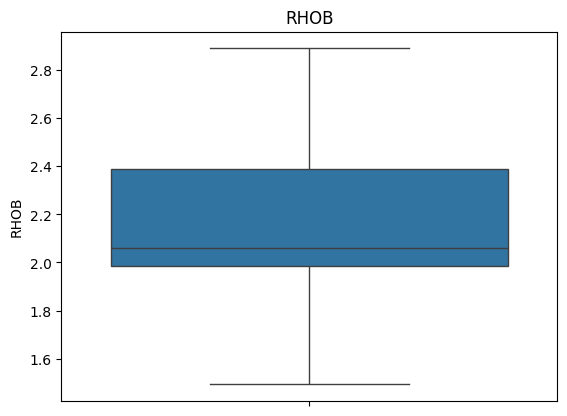

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


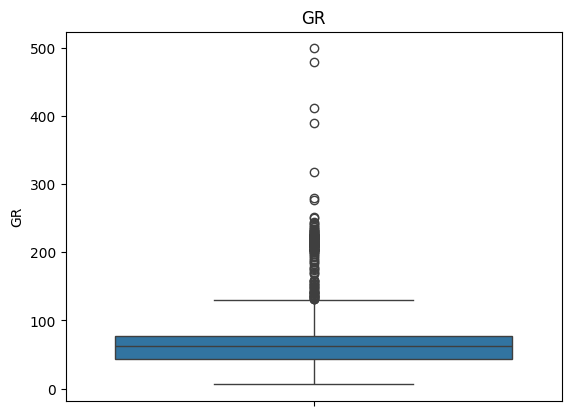

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


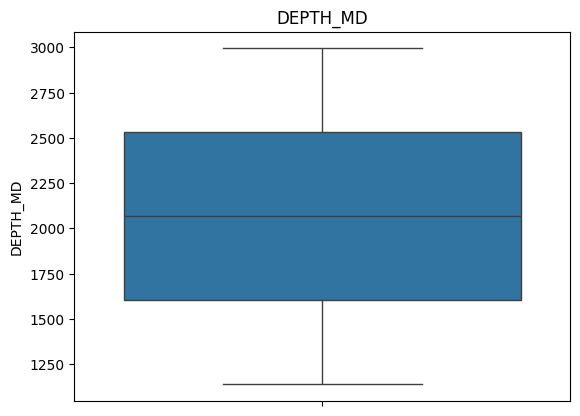

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


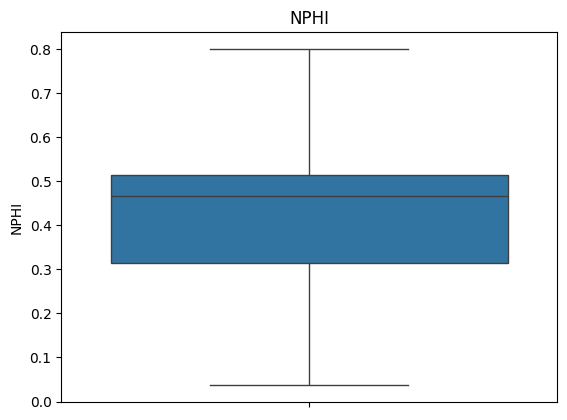

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


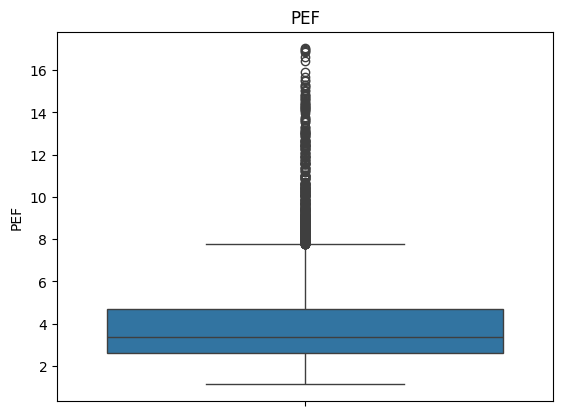

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


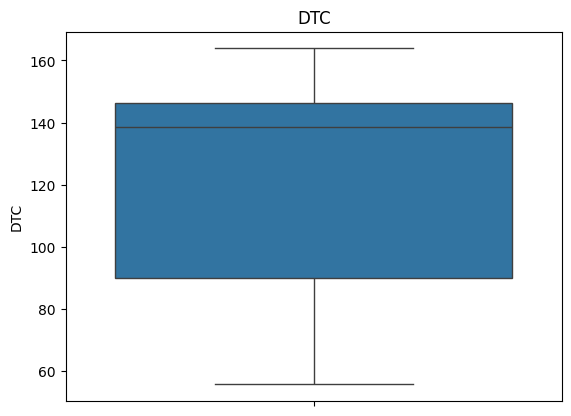

In [ ]:
for col in data.columns:
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()


In [ ]:
outlier_columns = []
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  if data[col].min() < lower_limit or data[col].max() > upper_limit:
    outlier_columns.append(col)
print(outlier_columns)


['GR', 'PEF']


In [ ]:
for col in outlier_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  data[col]=data[col].clip(lower_limit,upper_limit)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


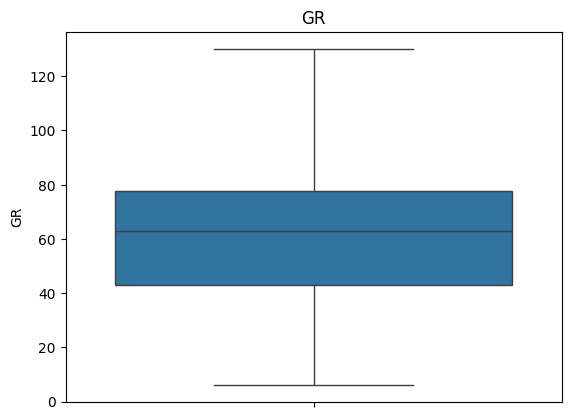

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


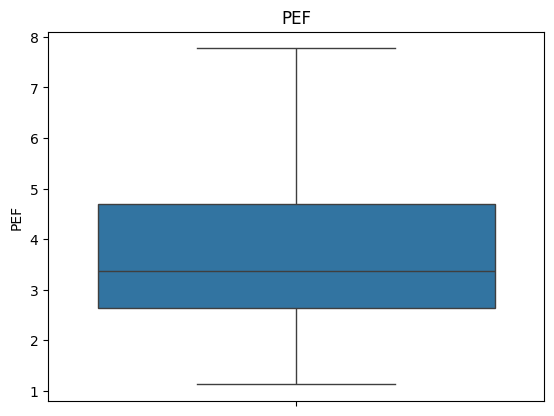

In [ ]:
for col in outlier_columns:
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()

**Scaling**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(x_scaled, columns=data.columns)
data_scaled

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-1.491843,-0.172783,-1.731605,2.523654,-1.467392,0.869531
1,-1.387067,0.022389,-1.731322,2.770744,-1.458303,0.690042
2,-1.320646,0.068432,-1.731038,2.524300,-1.457772,0.554350
3,-1.274390,0.025556,-1.730754,2.068584,-1.474937,0.585297
4,-1.335919,-0.071698,-1.730470,1.617342,-1.552118,0.752808
...,...,...,...,...,...,...
12197,1.265151,1.169790,1.730512,-0.524699,0.584975,-1.149449
12198,1.222550,1.103198,1.730796,-0.456081,0.584975,-1.158891
12199,1.110101,1.231461,1.731080,-0.356250,0.584975,-1.105910
12200,1.095199,1.376447,1.731363,-0.339430,0.936274,-1.095690


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
pred_cluster = kmeans.predict(data_scaled)

In [ ]:
pred_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

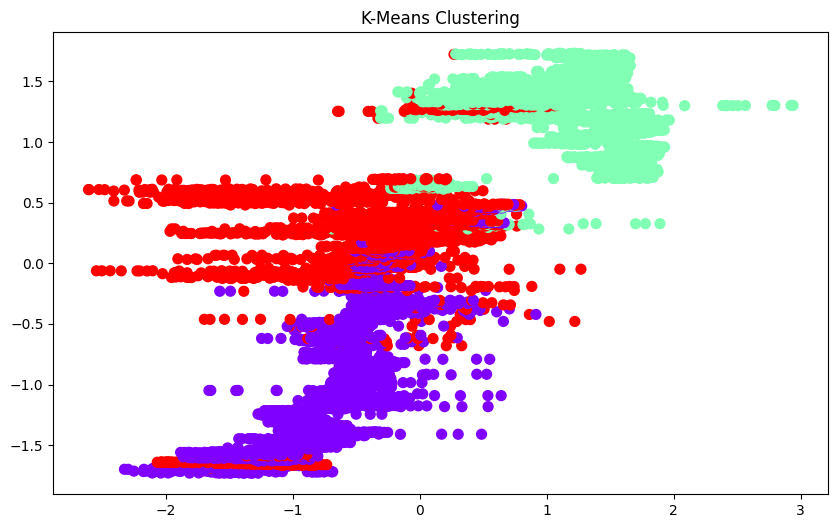

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['RHOB'], data_scaled['DEPTH_MD'], c=pred_cluster, cmap = 'rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.title('K-Means Clustering')
plt.show()

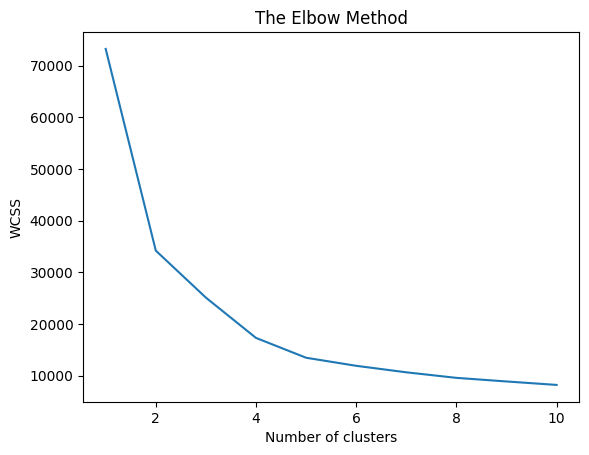

In [ ]:
wcss = []
for i in  range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',n_init = 10, random_state=42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

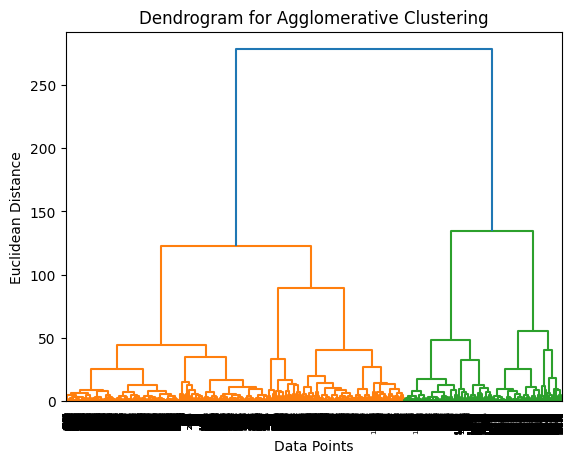

In [ ]:
Z = linkage(data_scaled, method = 'ward')
plt.figure()
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()